![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

### 1. Import and Load Data

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load each dataset 
workout = pd.read_csv("data/workout.csv")
three_keywords = pd.read_csv("data/three_keywords.csv")
workout_geo = pd.read_csv("data/workout_geo.csv")
three_keywords_geo = pd.read_csv("data/three_keywords_geo.csv")

### 2. When global search for workout was at its peak

In [2]:
# Preview workout data
display(workout.head())

# Inspect data structure and types
workout.info()

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              61 non-null     object
 1   workout_worldwide  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
#convert month column to datetime
workout['month'] = pd.to_datetime(workout['month'])

# Get the year from month column
workout['year'] = workout['month'].dt.year

# Calculate the mean workout worldwide groupby year
yearly_avg = workout.groupby('year')['workout_worldwide'].mean() 

# Convert the index of the max value to string
year_str = str(yearly_avg.idxmax())

# Display result
print('Year where global search for workout was at its peak: ', year_str)

Year where global search for workout was at its peak:  2020


### 3. Most popular keyword during the covid pandemic and now

In [4]:
# Preview three_keywords data
display(three_keywords.head())

# Inspect data structure and types
three_keywords.info()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   month                   61 non-null     object
 1   home_workout_worldwide  61 non-null     int64 
 2   gym_workout_worldwide   61 non-null     int64 
 3   home_gym_worldwide      61 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [5]:
# Convert 'month' column to datetime format
three_keywords['month'] = pd.to_datetime(three_keywords['month'])

# Filter the dataset for the COVID period (Jan 2020 to Dec 2021)
covid_df = three_keywords[
    (three_keywords['month'] >= '2020-01') & 
    (three_keywords['month'] <= '2021-12')
]

# Calculate the average interest for each keyword during the COVID period
covid_avg = covid_df.drop(columns='month').mean()

# Identify the keyword with the highest average interest during COVID
peak_covid = covid_avg.idxmax()

# Get the most recent month in the dataset
latest_month = three_keywords['month'].max()

# Retrieve keyword interest values for the latest month (drop date column)
current_row = three_keywords[
    three_keywords['month'] == latest_month
].drop(columns='month').iloc[0]

# Identify the most popular keyword in the latest month
current = current_row.idxmax()

# Output results
print("Most popular keyword during COVID:", peak_covid)
print("Most popular keyword now:", current)


Most popular keyword during COVID: home_workout_worldwide
Most popular keyword now: gym_workout_worldwide


### 4. Top Workout Country: US vs Australia vs Japan

In [6]:
# Preview three_keywords data
display(workout_geo.head())

# Inspect data structure and types
workout_geo.info()

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            250 non-null    object 
 1   workout_2018_2023  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


Top workout country: United States


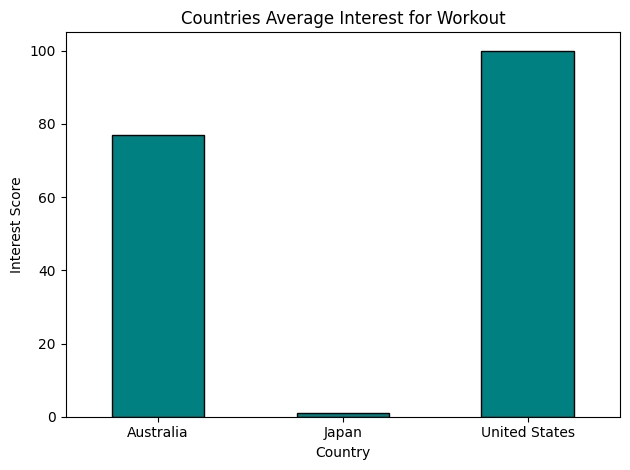

In [7]:
# Define the countries to compare
countries = ['United States', 'Australia', 'Japan']

# Filter the dataset for the selected countries
filtered_df = workout_geo[workout_geo['country'].isin(countries)]

# Calculate the average interest in 'workout' from 2018 to 2023, and identify the country with the highest average
filtered_df = filtered_df.groupby('country')['workout_2018_2023'].mean()
top_country = filtered_df.idxmax()

# Output the country with the highest workout interest
print('Top workout country:', top_country)

# Plot a bar chart comparing the average interest scores
filtered_df.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Countries Average Interest for Workout')
plt.xlabel('Country')
plt.ylabel('Interest Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 5. Higher Home Workout Interest: Philippines vs Malaysia

In [8]:
# Preview three_keywords data
display(three_keywords_geo.head())

# Inspect data structure and types
three_keywords_geo.info()

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 250 non-null    object 
 1   home_workout_2018_2023  47 non-null     float64
 2   gym_workout_2018_2023   47 non-null     float64
 3   home_gym_2018_2023      47 non-null     float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


Country most interested in home workout:  Philippines


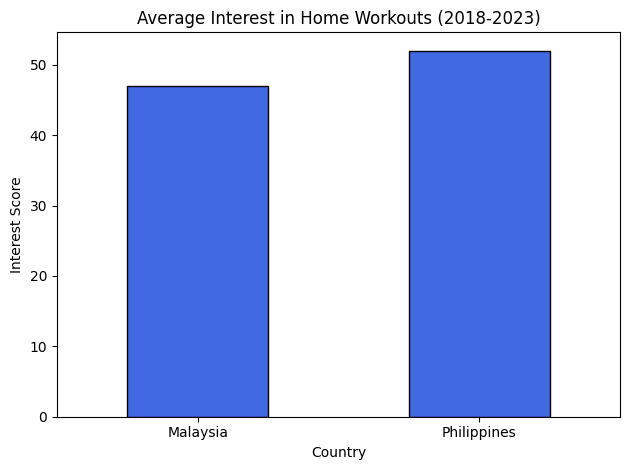

In [9]:
# Define the countries of interest
countries = ['Philippines', 'Malaysia']

# Filter the dataset for only the selected countries
filtered_df = three_keywords_geo[three_keywords_geo['Country'].isin(countries)]

# Calculate the average interest in home workouts from 2018 to 2023 for each country
avg_interest = filtered_df.groupby('Country')['home_workout_2018_2023'].mean()

# Identify the country with the highest average interest
home_workout_geo = avg_interest.idxmax()
print('Country most interested in home workout: ', home_workout_geo)

# Plot a bar chart comparing the average interest scores
avg_interest.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title('Average Interest in Home Workouts (2018-2023)')
plt.xlabel('Country')
plt.ylabel('Interest Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
